In [1]:
!pip install nltk spacy
!python -m spacy download en_core_web_sm
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 30.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 41.9 MB/s eta 0:00:00


In [2]:
import pandas as pd
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from nltk.tokenize import sent_tokenize, word_tokenize
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Bidirectional, Dropout
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from nltk.tokenize import word_tokenize
import spacy
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import random
from transformers import pipeline, AutoTokenizer, AutoModelForQuestionAnswering, T5ForConditionalGeneration, T5Tokenizer
import torch
from collections import Counter
import re
from sklearn.model_selection import train_test_split
from collections import Counter

from transformers import pipeline, T5ForConditionalGeneration, T5Tokenizer
from sklearn.metrics import f1_score

from nltk.translate.bleu_score import sentence_bleu

In [3]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab') # Download punkt_tab as it's needed for sent_tokenize
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ananthu017/squad-csv-format")

print("Path to dataset files:", path)

100%|██████████| 8.75M/8.75M [00:00<00:00, 34.5MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/ananthu017/squad-csv-format/versions/2


In [5]:
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/root/.cache/kagglehub/datasets/ananthu017/squad-csv-format/versions/2/SQuAD_csv.csv


In [6]:
df= pd.read_csv('/root/.cache/kagglehub/datasets/ananthu017/squad-csv-format/versions/2/SQuAD_csv.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86821 entries, 0 to 86820
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    86821 non-null  int64 
 1   context       86821 non-null  object
 2   question      86821 non-null  object
 3   id            86821 non-null  object
 4   answer_start  86821 non-null  int64 
 5   text          86818 non-null  object
dtypes: int64(2), object(4)
memory usage: 4.0+ MB


In [8]:
print("Number of Rows and Column:",df.shape)

Number of Rows and Column: (86821, 6)


In [9]:
frame = [df.loc[:5000][:]]

In [10]:
df= pd.concat(frame)

df.head()

,Unnamed: 0,context,question,id,answer_start,text
0,0,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,When did Beyonce start becoming popular?,56be85543aeaaa14008c9063,269,in the late 1990s
1,1,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,What areas did Beyonce compete in when she was...,56be85543aeaaa14008c9065,207,singing and dancing
2,2,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,When did Beyonce leave Destiny's Child and bec...,56be85543aeaaa14008c9066,526,2003
3,3,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,In what city and state did Beyonce grow up?,56bf6b0f3aeaaa14008c9601,166,"Houston, Texas"
4,4,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,In which decade did Beyonce become famous?,56bf6b0f3aeaaa14008c9602,276,late 1990s


In [11]:
print("Columns:", df.columns)
print("Shape:", df.shape)

Columns: Index(['Unnamed: 0', 'context', 'question', 'id', 'answer_start', 'text'], dtype='object')
Shape: (5001, 6)


In [12]:
print(df['question'].value_counts())

question
Who orchestrated Chopiniana?                                              2
Which airport was shut down?                                              2
How long was Chopin's funeral delayed?                                    2
What year did Chopin leave Warsaw?                                        2
Who was Alexander Scriabin's teacher?                                     2
                                                                         ..
When did the Jiajing Emperor reign?                                       1
According to article Tibet has remained under what jurisdiction?          1
Who does the article claim had two itinerant high commands over Tibet?    1
When was China Daily started?                                             1
What establishment did the politics at court shift in favor of?           1
Name: count, Length: 4986, dtype: int64


In [13]:
print(df['text'][0][:500])

in the late 1990s


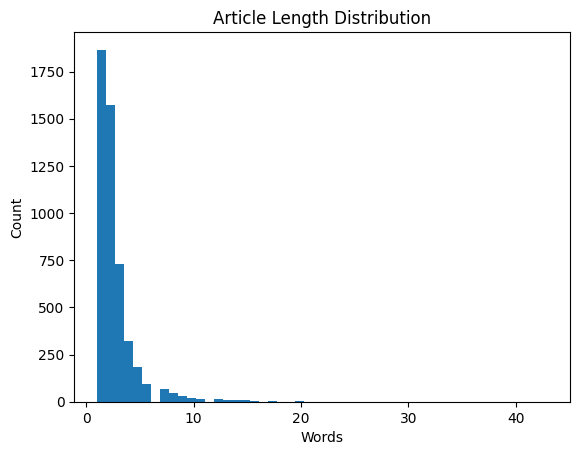

In [14]:
df['length'] = df['text'].apply(lambda x: len(x.split()))
plt.hist(df['length'], bins=50)
plt.title("Article Length Distribution")
plt.xlabel("Words")
plt.ylabel("Count")
plt.show()


In [15]:
import re

def clean_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r'[^a-z0-9\s]', '', text)
        text = re.sub(r'\s+', ' ', text)
        return text.strip()
    return ""

df['clean_context'] = df['context'].apply(clean_text)
df['clean_question'] = df['question'].apply(clean_text)
df['clean_answer'] = df['text'].apply(clean_text)

df['tokens'] = df['clean_context'].apply(word_tokenize)

In [16]:
df['clean_context'][0][:500]

'beyonc giselle knowlescarter bijnse beeyonsay born september 4 1981 is an american singer songwriter record producer and actress born and raised in houston texas she performed in various singing and dancing competitions as a child and rose to fame in the late 1990s as lead singer of rb girlgroup destinys child managed by her father mathew knowles the group became one of the worlds bestselling girl groups of all time their hiatus saw the release of beyoncs debut album dangerously in love 2003 whi'

In [17]:
sample_text = df['clean_context'].iloc[0]

sentences_nltk = sent_tokenize(sample_text)
words_nltk = word_tokenize(sample_text)

print("NLTK Sentences:", sentences_nltk[:3])
print("NLTK Words:", words_nltk[:20])

NLTK Sentences: ['beyonc giselle knowlescarter bijnse beeyonsay born september 4 1981 is an american singer songwriter record producer and actress born and raised in houston texas she performed in various singing and dancing competitions as a child and rose to fame in the late 1990s as lead singer of rb girlgroup destinys child managed by her father mathew knowles the group became one of the worlds bestselling girl groups of all time their hiatus saw the release of beyoncs debut album dangerously in love 2003 which established her as a solo artist worldwide earned five grammy awards and featured the billboard hot 100 numberone singles crazy in love and baby boy']
NLTK Words: ['beyonc', 'giselle', 'knowlescarter', 'bijnse', 'beeyonsay', 'born', 'september', '4', '1981', 'is', 'an', 'american', 'singer', 'songwriter', 'record', 'producer', 'and', 'actress', 'born', 'and']


In [18]:
nlp = spacy.load("en_core_web_sm")

doc = nlp(sample_text)
sentences_spacy = [sent.text for sent in doc.sents]
tokens_spacy = [token.text for token in doc]

print("spaCy Sentences:", sentences_spacy[:3])
print("spaCy Tokens:", tokens_spacy[:20])


spaCy Sentences: ['beyonc giselle knowlescarter bijnse beeyonsay born september 4 1981 is an american singer songwriter record producer and actress born and raised in houston texas she performed in various singing and dancing competitions as a child and rose to fame in the late 1990s as lead singer of rb girlgroup destinys child managed by her father mathew knowles the group became one of the worlds bestselling girl groups of all time their hiatus saw the release of beyoncs debut album dangerously in love 2003 which established her as a solo artist worldwide earned five grammy awards and featured the billboard hot 100 numberone singles crazy in love and baby boy']
spaCy Tokens: ['beyonc', 'giselle', 'knowlescarter', 'bijnse', 'beeyonsay', 'born', 'september', '4', '1981', 'is', 'an', 'american', 'singer', 'songwriter', 'record', 'producer', 'and', 'actress', 'born', 'and']


In [19]:
train_df, temp_df = train_test_split(df, test_size=0.3, random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

**Stopwords, Lemmatization & Normalization**

In [20]:
stop_words = set(stopwords.words('english'))

filtered_nltk = [w.lower() for w in words_nltk if w.lower() not in stop_words and w.isalpha()]
filtered_nltk

['beyonc',
 'giselle',
 'knowlescarter',
 'bijnse',
 'beeyonsay',
 'born',
 'september',
 'american',
 'singer',
 'songwriter',
 'record',
 'producer',
 'actress',
 'born',
 'raised',
 'houston',
 'texas',
 'performed',
 'various',
 'singing',
 'dancing',
 'competitions',
 'child',
 'rose',
 'fame',
 'late',
 'lead',
 'singer',
 'rb',
 'girlgroup',
 'destinys',
 'child',
 'managed',
 'father',
 'mathew',
 'knowles',
 'group',
 'became',
 'one',
 'worlds',
 'bestselling',
 'girl',
 'groups',
 'time',
 'hiatus',
 'saw',
 'release',
 'beyoncs',
 'debut',
 'album',
 'dangerously',
 'love',
 'established',
 'solo',
 'artist',
 'worldwide',
 'earned',
 'five',
 'grammy',
 'awards',
 'featured',
 'billboard',
 'hot',
 'numberone',
 'singles',
 'crazy',
 'love',
 'baby',
 'boy']

In [21]:
nlp = spacy.load("en_core_web_sm")

doc = nlp(sample_text)

In [22]:
filtered_spacy = [token.lemma_.lower() for token in doc if not token.is_stop and token.is_alpha]
filtered_spacy

['beyonc',
 'giselle',
 'knowlescarter',
 'bijnse',
 'beeyonsay',
 'bear',
 'september',
 'american',
 'singer',
 'songwriter',
 'record',
 'producer',
 'actress',
 'bear',
 'raise',
 'houston',
 'texas',
 'perform',
 'singing',
 'dancing',
 'competition',
 'child',
 'rise',
 'fame',
 'late',
 'lead',
 'singer',
 'rb',
 'girlgroup',
 'destinys',
 'child',
 'manage',
 'father',
 'mathew',
 'knowle',
 'group',
 'world',
 'bestselle',
 'girl',
 'group',
 'time',
 'hiatus',
 'see',
 'release',
 'beyoncs',
 'debut',
 'album',
 'dangerously',
 'love',
 'establish',
 'solo',
 'artist',
 'worldwide',
 'earn',
 'grammy',
 'award',
 'feature',
 'billboard',
 'hot',
 'numberone',
 'single',
 'crazy',
 'love',
 'baby',
 'boy']

# Skip-gramm

In [23]:
!pip install gensim matplotlib nltk

In [24]:
sentences = df['tokens'][:5000]

In [25]:
w2v_skip = Word2Vec(
    sentences=sentences,
    vector_size=100,
    window=5,
    min_count=5,
    sg=1,
    epochs=10
)

w2v_skip.save("word2vec.model")

In [26]:
print(w2v_skip.wv.most_similar('late'))

[('registration', 0.6593966484069824), ('gloss', 0.6517993211746216), ('2007s', 0.618355393409729), ('baroqueinflected', 0.6002415418624878), ('pomp', 0.5980979800224304), ('arenainspired', 0.5920930504798889), ('toomp', 0.5651764869689941), ('journalists', 0.5507316589355469), ('dated', 0.5406811833381653), ('registrations', 0.5130144357681274)]


In [27]:
def plot_pca(model, title):
    words = model.wv.index_to_key
    vectors = model.wv[words]

    pca = PCA(n_components=2)
    reduced = pca.fit_transform(vectors)

    plt.figure(figsize=(10, 6))
    plt.scatter(reduced[:, 0], reduced[:, 1], s=5)
    plt.title(title)
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.grid(True)
    plt.show()

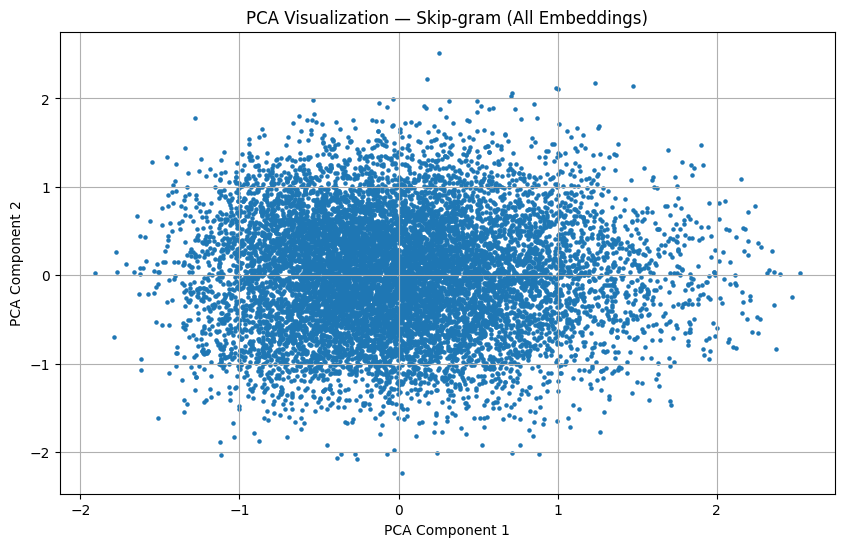

In [28]:
plot_pca(w2v_skip, "PCA Visualization — Skip-gram (All Embeddings)")

# CBOW

In [29]:
w2v_cbow = Word2Vec(
    sentences=sentences,
    vector_size=100,
    window=5,
    min_count=5,
    sg=0,
    epochs=10
)

w2v_cbow.save("bbc_word2vec.model")


In [30]:
print(w2v_cbow.wv.most_similar('late'))

[('america', 0.6430495381355286), ('sons', 0.6356192827224731), ('1765', 0.6087309718132019), ('envisioned', 0.6086748838424683), ('2011', 0.6051538586616516), ('1848', 0.6003432869911194), ('2007', 0.5979527831077576), ('registration', 0.5919926762580872), ('2012', 0.588544487953186), ('1998', 0.5769703984260559)]


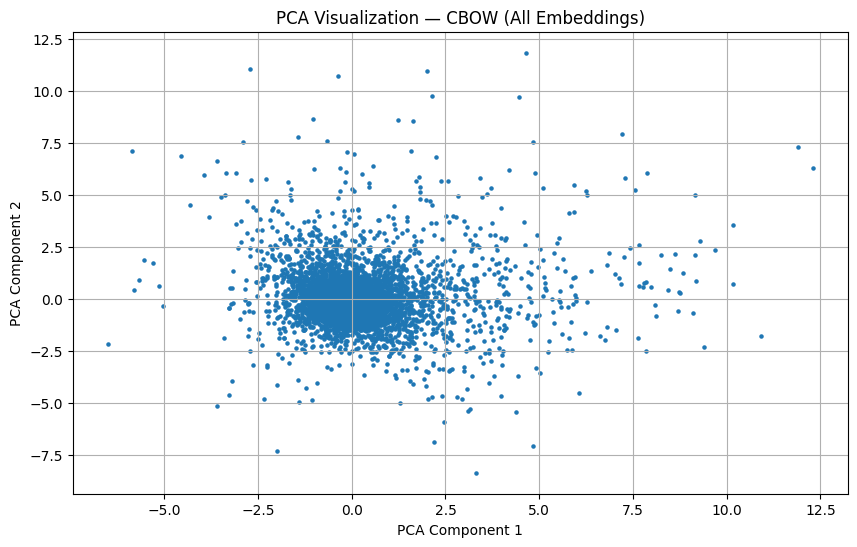

In [31]:
plot_pca(w2v_cbow, "PCA Visualization — CBOW (All Embeddings)")

In [32]:
selected_document_tokens = df['tokens'].iloc[1]

for i in selected_document_tokens:
    if i in w2v_cbow.wv and i in w2v_skip.wv:
        print(f"\nWord: {i}")
        print("CBOW: ", w2v_cbow.wv.most_similar(i, topn=5))
        print("Skip-gram:", w2v_skip.wv.most_similar(i, topn=5))



Word: beyonc
CBOW:  [('west', 0.5285757780075073), ('irony', 0.5151786208152771), ('coachella', 0.513677716255188), ('2009', 0.5126319527626038), ('mendes', 0.5106194019317627)]
Skip-gram: [('coachella', 0.5087761878967285), ('her', 0.5071563720703125), ('performing', 0.48231741786003113), ('mixtape', 0.47226235270500183), ('reconsider', 0.4630133807659149)]

Word: giselle
CBOW:  [('knowlescarter', 0.9225638508796692), ('bijnse', 0.8494645953178406), ('iglesias', 0.8334973454475403), ('beeyonsay', 0.8064993619918823), ('1516yearolds', 0.8062182664871216)]
Skip-gram: [('knowlescarter', 0.9451441764831543), ('bijnse', 0.9262781739234924), ('beeyonsay', 0.9024495482444763), ('celestine', 0.8345212340354919), ('omari', 0.7811431288719177)]

Word: knowlescarter
CBOW:  [('bijnse', 0.9788694381713867), ('beeyonsay', 0.9436848163604736), ('giselle', 0.9225637912750244), ('wola', 0.8562036156654358), ('elazowa', 0.8438875079154968)]
Skip-gram: [('bijnse', 0.9905519485473633), ('beeyonsay', 0.9

# T-sne viss

In [33]:
def plot_tsne(model, title, max_words=1000):
    words = model.wv.index_to_key

    if len(words) > max_words:
        words = random.sample(words, max_words)

    vectors = np.array([model.wv[w] for w in words])

    tsne = TSNE(
        n_components=2,
        perplexity=30,
        learning_rate="auto",
        init="pca",
        random_state=42
    )

    reduced = tsne.fit_transform(vectors)

    plt.figure(figsize=(10, 6))
    plt.scatter(reduced[:, 0], reduced[:, 1], s=6)
    plt.title(title)
    plt.xlabel("t-SNE Dim 1")
    plt.ylabel("t-SNE Dim 2")
    plt.grid(True)
    plt.show()

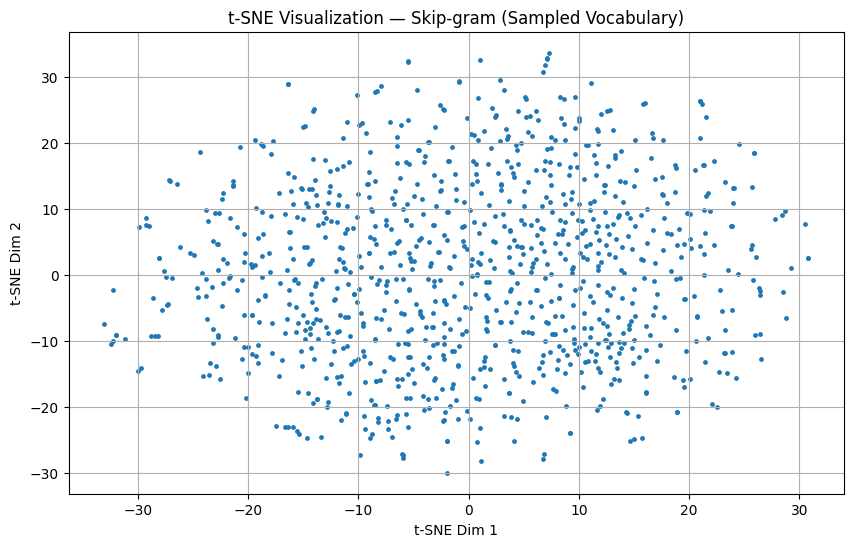

In [34]:
plot_tsne(w2v_skip, "t-SNE Visualization — Skip-gram (Sampled Vocabulary)")

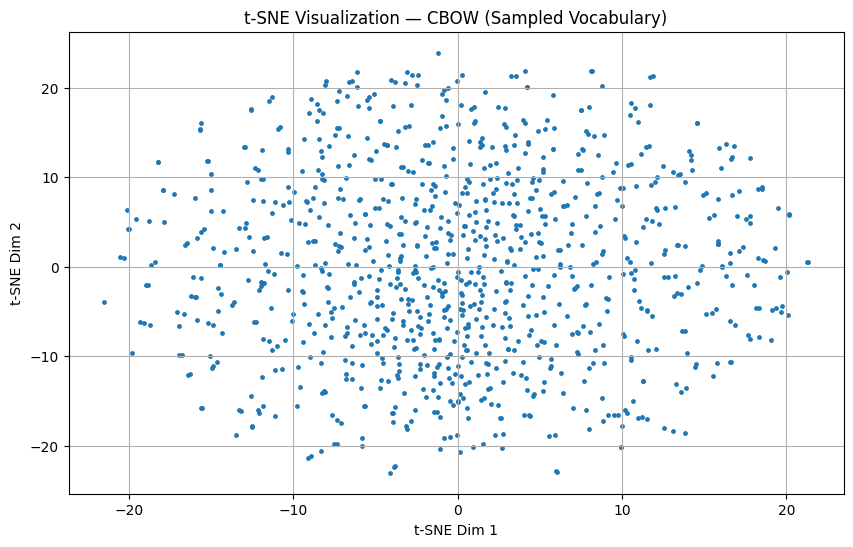

In [35]:
plot_tsne(w2v_cbow, "t-SNE Visualization — CBOW (Sampled Vocabulary)")

In [36]:
def classify_question_type(question):
    question_lower = question.lower()
    if any(word in question_lower for word in ['who', 'whom', 'whose']):
        return 'PERSON'
    elif any(word in question_lower for word in ['when', 'what year', 'what time']):
        return 'TIME'
    elif any(word in question_lower for word in ['where', 'which location']):
        return 'LOCATION'
    elif any(word in question_lower for word in ['why', 'how', 'what way']):
        return 'REASON'
    elif any(word in question_lower for word in ['what', 'which']):
        return 'OBJECT'
    else:
        return 'FACT'

df['question_type'] = df['clean_question'].apply(classify_question_type)

# TF-IDF

In [37]:
# TF-IDF for context and questions
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['clean_context'])

def find_similar_contexts(query, top_k=5):
    query_vec = tfidf_vectorizer.transform([query])
    similarities = cosine_similarity(query_vec, tfidf_matrix).flatten()
    top_indices = similarities.argsort()[-top_k:][::-1]
    return top_indices, similarities[top_indices]

phase 2

BERT

In [38]:
class BERTQuizGenerator:
    def __init__(self, df):
        self.df = df
        self.qa_pipeline = pipeline("question-answering")

    def generate_quiz(self, num_questions=5):
        quiz = []
        for _ in range(num_questions):
            row = self.df.sample(1).iloc[0]
            context = row['clean_context'][:500]
            question = row['clean_question']
            answer = row['clean_answer']

            bert_result = self.qa_pipeline(question=question, context=context)

            quiz.append({
                'question': question,
                'context': context,
                'correct_answer': answer,
                'bert_answer': bert_result['answer'],
                'bert_confidence': bert_result['score']
            })
        return quiz


In [39]:
bert_gen = BERTQuizGenerator(df)
bert_quiz = bert_gen.generate_quiz(3)

print("\n===== BERT GENERATED QUIZ =====")
for i, q in enumerate(bert_quiz, 1):
    print(f"\nQ{i}: {q['question']}")
    print(f"Context: {q['context'][:200]}...")
    print(f"Answer: {q['correct_answer']}")
    print(f"BERT found: {q['bert_answer']} (conf={q['bert_confidence']:.2f})")

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cpu



===== BERT GENERATED QUIZ =====

Q1: which prominent star felt the 2009 female video of the year award should have went to beyonc instead of taylor swift
Context: on april 4 2008 beyonc married jay z she publicly revealed their marriage in a video montage at the listening party for her third studio album i am sasha fierce in manhattans sony club on october 22 2...
Answer: kanye west
BERT found: jay z (conf=0.38)

Q2: how many piano concerts did frdric perform in vienna during this time
Context: back in warsaw that year chopin heard niccol paganini play the violin and composed a set of variations souvenir de paganini it may have been this experience which encouraged him to commence writing hi...
Answer: two
BERT found: two (conf=0.82)

Q3: what had to be evacuated due to potential flooding
Context: as a result of the magnitude 79 earthquake and the many strong aftershocks many rivers became blocked by large landslides which resulted in the formation of quake lakes behind the blockages 

 T5

In [40]:
class T5QuizGenerator:
    def __init__(self, df, model_name="t5-small"):
        self.df = df
        self.device = 0 if torch.cuda.is_available() else -1
        self.tokenizer = T5Tokenizer.from_pretrained(model_name)
        self.model = T5ForConditionalGeneration.from_pretrained(model_name).to(
            "cuda" if torch.cuda.is_available() else "cpu"
        )

    def generate_quiz(self, num_questions=5):
        quiz = []
        for _ in range(num_questions):
            row = self.df.sample(1).iloc[0]
            context = row['clean_context'][:500]
            # Prepare T5 input format: "generate question: <context>"
            input_text = f"generate question: {context}"
            inputs = self.tokenizer.encode(input_text, return_tensors="pt").to(
                "cuda" if torch.cuda.is_available() else "cpu"
            )
            outputs = self.model.generate(inputs, max_length=50, num_beams=5)
            question_generated = self.tokenizer.decode(outputs[0], skip_special_tokens=True)

            quiz.append({
                'context': context,
                'question': question_generated,
                'correct_answer': row['clean_answer']
            })
        return quiz

In [41]:
t5_gen = T5QuizGenerator(df)
t5_quiz = t5_gen.generate_quiz(3)

print("\n===== T5 GENERATED QUIZ =====")
for i, q in enumerate(t5_quiz, 1):
    print(f"\nQ{i}: {q['question']}")
    print(f"Context: {q['context'][:200]}...")
    print(f"Answer: {q['correct_answer']}")

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]


===== T5 GENERATED QUIZ =====

Q1: mexico and during a scheduled break craig was flown to new york to undergo minor surgery to fix his knee injury it was reported that filming was not affected and he had returned to filming at pinewood studio
Context: following filming in mexico and during a scheduled break craig was flown to new york to undergo minor surgery to fix his knee injury it was reported that filming was not affected and he had returned t...
Answer: 22 april

Q2: jennifer hudson jamie foxx and eddie murphy playing a pop singer based on diana ross
Context: her first acting role of 2006 was in the comedy film the pink panther starring opposite steve martin grossing 1588 million at the box office worldwide her second film dreamgirls the film version of th...
Answer: the beyonc experience

Q3: not_duplicate
Context: one year after its publication to kill a mockingbird had been translated into ten languages in the years since it has sold more than 30 million copies and been trans

# Evaluation

1) BERT

In [42]:
def compute_exact_match(pred_answer, true_answer):
    return int(pred_answer.strip() == true_answer.strip())

def compute_f1(pred_answer, true_answer):
    pred_tokens = pred_answer.split()
    true_tokens = true_answer.split()
    common = set(pred_tokens) & set(true_tokens)
    if len(common) == 0:
        return 0.0
    precision = len(common) / len(pred_tokens)
    recall = len(common) / len(true_tokens)
    return 2 * precision * recall / (precision + recall)

# Evaluate BERT on test set
bert_pipeline = pipeline("question-answering")

bert_em_scores = []
bert_f1_scores = []

print("Evaluating BERT on test set…")
for idx, row in test_df.iterrows():
    context = row['clean_context'][:500]
    question = row['clean_question']
    true_answer = row['clean_answer']

    bert_pred = bert_pipeline(question=question, context=context)['answer']

    em = compute_exact_match(bert_pred, true_answer)
    f1 = compute_f1(bert_pred, true_answer)

    bert_em_scores.append(em)
    bert_f1_scores.append(f1)

print(f"BERT Exact Match: {np.mean(bert_em_scores):.4f}")
print(f"BERT F1 Score: {np.mean(bert_f1_scores):.4f}")

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


Evaluating BERT on test set…
BERT Exact Match: 0.4834
BERT F1 Score: 0.6234


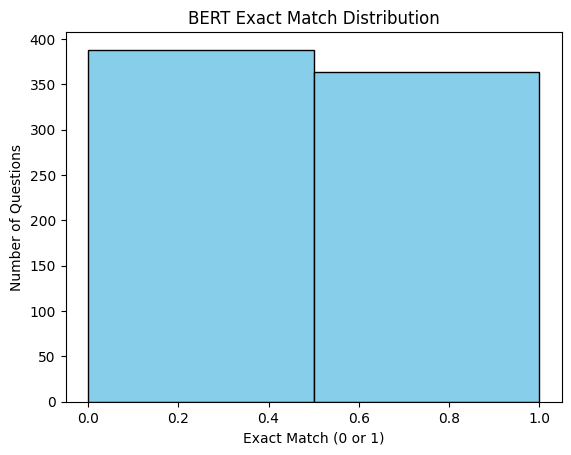

In [43]:
plt.hist(bert_em_scores, bins=2, color='skyblue', edgecolor='black')
plt.title("BERT Exact Match Distribution")
plt.xlabel("Exact Match (0 or 1)")
plt.ylabel("Number of Questions")
plt.show()

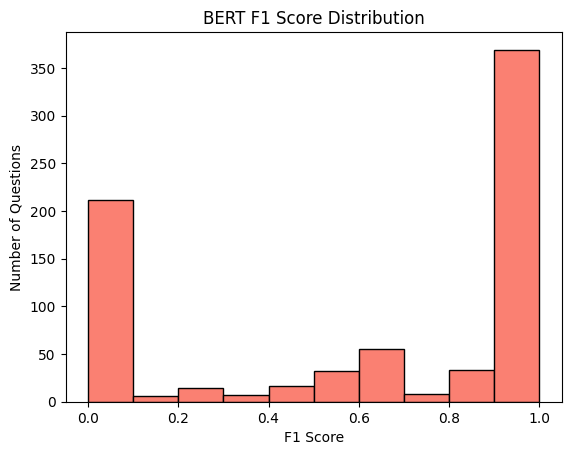

In [44]:
plt.hist(bert_f1_scores, bins=10, color='salmon', edgecolor='black')
plt.title("BERT F1 Score Distribution")
plt.xlabel("F1 Score")
plt.ylabel("Number of Questions")
plt.show()

2) T5

In [45]:
t5_model_name = "valhalla/t5-small-qg-hl"
t5_tokenizer = T5Tokenizer.from_pretrained(t5_model_name)
t5_model = T5ForConditionalGeneration.from_pretrained(t5_model_name).to(
    "cuda" if torch.cuda.is_available() else "cpu"
)

def generate_question_t5(context, max_len=50):
    input_text = f"generate question: {context[:500]}"
    inputs = t5_tokenizer.encode(input_text, return_tensors="pt").to(
        "cuda" if torch.cuda.is_available() else "cpu"
    )
    outputs = t5_model.generate(inputs, max_length=max_len, num_beams=5)
    question = t5_tokenizer.decode(outputs[0], skip_special_tokens=True)
    return question

# Evaluate T5 on test set using BLEU score
t5_bleu_scores = []

print("Evaluating T5 on test set…")
for idx, row in test_df.iterrows():
    context = row['clean_context']
    reference_question = row['clean_question'].split()

    generated_question = generate_question_t5(context)
    generated_tokens = generated_question.split()

    bleu = sentence_bleu([reference_question], generated_tokens, weights=(0.5, 0.5))
    t5_bleu_scores.append(bleu)

print(f"T5 Average BLEU Score: {np.mean(t5_bleu_scores):.4f}")

tokenizer_config.json:   0%|          | 0.00/90.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/31.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/627 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/242M [00:00<?, ?B/s]

Evaluating T5 on test set…


model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

/usr/local/lib/python3.12/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


T5 Average BLEU Score: 0.0555


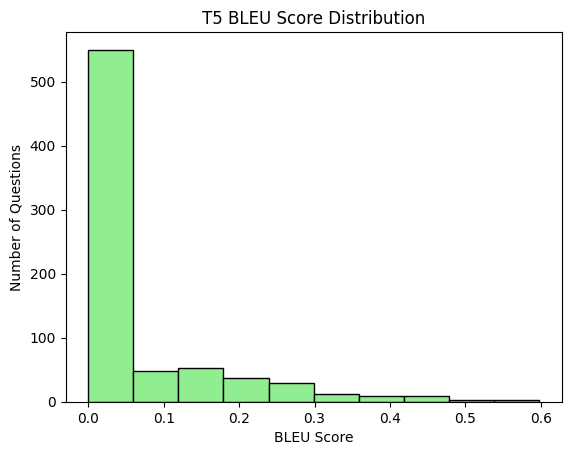

In [46]:
plt.hist(t5_bleu_scores, bins=10, color='lightgreen', edgecolor='black')
plt.title("T5 BLEU Score Distribution")
plt.xlabel("BLEU Score")
plt.ylabel("Number of Questions")
plt.show()

# Comparison

In [47]:
print("\n===== MODEL COMPARISON =====")
print(f"BERT (QA extraction) -> EM: {np.mean(bert_em_scores):.4f}, F1: {np.mean(bert_f1_scores):.4f}")
print(f"T5 (Question generation) -> BLEU: {np.mean(t5_bleu_scores):.4f}")


===== MODEL COMPARISON =====
BERT (QA extraction) -> EM: 0.4834, F1: 0.6234
T5 (Question generation) -> BLEU: 0.0555


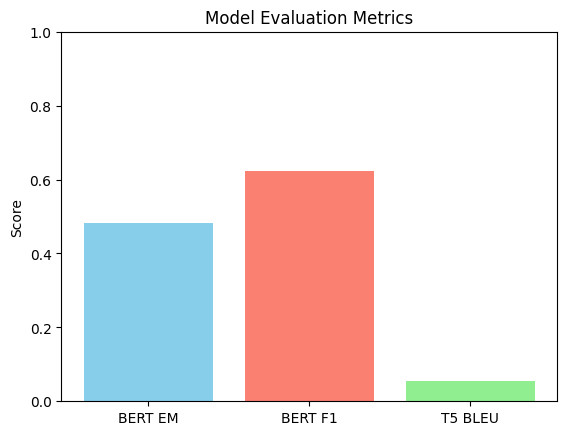

In [48]:
metrics = {
    'BERT EM': np.mean(bert_em_scores),
    'BERT F1': np.mean(bert_f1_scores),
    'T5 BLEU': np.mean(t5_bleu_scores)
}

plt.bar(metrics.keys(), metrics.values(), color=['skyblue','salmon','lightgreen'])
plt.title("Model Evaluation Metrics")
plt.ylabel("Score")
plt.ylim(0,1)
plt.show()

# Limitations

In [49]:
print("\n===== MISCLASSIFIED / HARD EXAMPLES =====")
for idx, row in test_df.head(15).iterrows():  # show first 5 examples
    context = row['clean_context'][:500]
    question = row['clean_question']
    true_answer = row['clean_answer']

    bert_pred = bert_pipeline(question=question, context=context)['answer']
    t5_pred = generate_question_t5(row['clean_context'])

    print(f"\nContext: {context[:200]}...")
    print(f"Reference Question: {question}")
    print(f"Reference Answer: {true_answer}")
    print(f"BERT Predicted Answer: {bert_pred}")
    print(f"T5 Generated Question: {t5_pred}")
    print("-" * 50)


===== MISCLASSIFIED / HARD EXAMPLES =====

Context: on november 10 2007 at approximately 735 pm paramedics responding to an emergency call transported wests mother donda west to the nearby centinela freeman hospital in marina del rey california she was...
Reference Question: what doctor originally turned donda west down for her plastic surgery operation
Reference Answer: andre aboolian
BERT Predicted Answer: mother
T5 Generated Question: What did paramedics respond to an emergency call on november 10 2007?
--------------------------------------------------

Context: the story sees bond pitted against the global criminal organisation spectre marking the groups first appearance in an eon productions film since 1971s diamonds are forevern 2 and tying craigs series o...
Reference Question: which actor plays the role of mr hinx
Reference Answer: dave bautista
BERT Predicted Answer: dr madeleine swann dave bautista
T5 Generated Question: What is the name of the eon productions film that see

# **Additional Part**

# Generate the quiz by T5 and answer by BERT

In [50]:
device = 0 if torch.cuda.is_available() else -1

In [51]:
context = row['clean_context']

In [52]:
from nltk.translate.bleu_score import SmoothingFunction

bert_pipeline = pipeline("question-answering", device=device)

def generate_quiz_t5_bert(df, num_questions=5):
    smooth = SmoothingFunction().method1
    quiz = []

    sampled_df = df.sample(min(num_questions, len(df)), random_state=42)
    for idx, row in sampled_df.iterrows():
        context = row['clean_context'][:500]

        # --- T5: Generate question ---
        input_text = f"generate question: {context}"
        inputs = t5_tokenizer.encode(input_text, return_tensors="pt").to(
            "cuda" if torch.cuda.is_available() else "cpu"
        )
        outputs = t5_model.generate(inputs, max_length=50, num_beams=5)
        question = t5_tokenizer.decode(outputs[0], skip_special_tokens=True)

        # --- BERT: Predict answer ---
        bert_pred = bert_pipeline(question=question, context=context)
        answer = bert_pred['answer']
        confidence = bert_pred['score']

        # --- Optional BLEU score against reference ---
        reference_question = row['clean_question'].split()
        generated_tokens = question.split()
        bleu = sentence_bleu([reference_question], generated_tokens, smoothing_function=smooth)

        quiz.append({
            'context': context,
            'reference_question': row['clean_question'],
            'generated_question': question,
            'reference_answer': row['clean_answer'],
            'bert_answer': answer,
            'bert_confidence': confidence,
            'bleu': bleu
        })

    return quiz

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


In [53]:
quiz = generate_quiz_t5_bert(df, num_questions=15)

for i, q in enumerate(quiz, 1):
    print(f"\n=== Quiz {i} ===")
    print(f"Context (snippet): {q['context'][:200]}...")
    print(f"Reference Question: {q['reference_question']}")
    print(f"T5 Generated Question: {q['generated_question']}")
    print(f"Reference Answer: {q['reference_answer']}")
    print(f"BERT Predicted Answer: {q['bert_answer']} (confidence={q['bert_confidence']:.2f})")
    print(f"BLEU score (question similarity): {q['bleu']:.4f}")


=== Quiz 1 ===
Context (snippet): however the early ming government enacted a law later rescinded which forbade han chinese to learn the tenets of tibetan buddhism there is little detailed evidence of chineseespecially lay chinesestud...
Reference Question: who created a law that did not allow han chinese to learn the beliefs of tibetan buddhism
T5 Generated Question: How did han chinese learn the tenets of tibetan buddhism?
Reference Answer: ming government
BERT Predicted Answer: early ming government enacted a law later rescinded (confidence=0.06)
BLEU score (question similarity): 0.0399

=== Quiz 2 ===
Context (snippet): the earthquake had a magnitude of 80 ms and 79 mw the epicenter was in wenchuan county ngawa tibetan and qiang autonomous prefecture 80 km westnorthwest of the provincial capital of chengdu with its m...
Reference Question: what percentage of buildings were destroyed during the quake
T5 Generated Question: What was the magnitude of the quake?
Reference Answer: almo

# UI

In [65]:
from flask import Flask, render_template_string, request, jsonify
from IPython.display import display, HTML
from threading import Thread
import time
import numpy as np

app = Flask(__name__)

HTML_TEMPLATE ="""
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>AI Quiz Generator</title>
    <style>
        * {
            margin: 0;
            padding: 0;
            box-sizing: border-box;
        }

        body {
            font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
            background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
            min-height: 100vh;
            padding: 40px 20px;
        }

        .container {
            max-width: 900px;
            margin: 0 auto;
            background: rgba(255, 255, 255, 0.95);
            border-radius: 20px;
            box-shadow: 0 20px 60px rgba(0, 0, 0, 0.3);
            overflow: hidden;
        }

        .header {
            background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
            padding: 40px;
            text-align: center;
            color: white;
        }

        .header h1 {
            font-size: 2.5em;
            font-weight: 600;
            margin-bottom: 10px;
            text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.2);
        }

        .header p {
            font-size: 1.1em;
            opacity: 0.9;
        }

        .content {
            padding: 40px;
        }

        .setup-screen, .quiz-screen, .results-screen {
            display: none;
        }

        .setup-screen.active, .quiz-screen.active, .results-screen.active {
            display: block;
        }

        .form-group {
            margin-bottom: 30px;
        }

        .form-group label {
            display: block;
            font-size: 1.1em;
            font-weight: 600;
            color: #333;
            margin-bottom: 10px;
        }

        .input-wrapper {
            display: flex;
            align-items: center;
            gap: 15px;
        }

        input[type="number"], input[type="text"] {
            flex: 1;
            padding: 12px 20px;
            font-size: 1.1em;
            border: 2px solid #e0e0e0;
            border-radius: 10px;
            transition: all 0.3s ease;
            outline: none;
        }

        input[type="number"]:focus, input[type="text"]:focus {
            border-color: #667eea;
            box-shadow: 0 0 0 3px rgba(102, 126, 234, 0.1);
        }

        .btn {
            padding: 12px 40px;
            font-size: 1.1em;
            font-weight: 600;
            color: white;
            background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
            border: none;
            border-radius: 10px;
            cursor: pointer;
            transition: all 0.3s ease;
            box-shadow: 0 4px 15px rgba(102, 126, 234, 0.4);
        }

        .btn:hover:not(:disabled) {
            transform: translateY(-2px);
            box-shadow: 0 6px 20px rgba(102, 126, 234, 0.6);
        }

        .btn:disabled {
            opacity: 0.6;
            cursor: not-allowed;
            transform: none;
        }

        .btn-secondary {
            background: linear-gradient(135deg, #f093fb 0%, #f5576c 100%);
        }

        .btn-outline {
            background: white;
            color: #667eea;
            border: 2px solid #667eea;
            box-shadow: none;
        }

        .btn-outline:hover:not(:disabled) {
            background: #667eea;
            color: white;
        }

        .loading {
            text-align: center;
            padding: 40px;
            font-size: 1.2em;
            color: #667eea;
        }

        .loading::after {
            content: '...';
            animation: dots 1.5s infinite;
        }

        @keyframes dots {
            0%, 20% { content: '.'; }
            40% { content: '..'; }
            60%, 100% { content: '...'; }
        }

        .error {
            padding: 20px;
            background: #fee;
            border-left: 4px solid #f44336;
            border-radius: 8px;
            color: #c62828;
            font-weight: 500;
        }

        .progress-bar {
            background: #e0e0e0;
            height: 8px;
            border-radius: 10px;
            margin-bottom: 30px;
            overflow: hidden;
        }

        .progress-fill {
            background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
            height: 100%;
            transition: width 0.3s ease;
        }

        .progress-info {
            display: flex;
            justify-content: space-between;
            align-items: center;
            margin-bottom: 10px;
        }

        .progress-text {
            color: #666;
            font-weight: 600;
        }

        .score-badge {
            background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
            color: white;
            padding: 5px 15px;
            border-radius: 20px;
            font-size: 0.9em;
            font-weight: 600;
        }

        .question-card {
            background: #f8f9fa;
            padding: 30px;
            border-radius: 12px;
            border-left: 5px solid #667eea;
            margin-bottom: 30px;
        }

        .question-number {
            display: inline-block;
            background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
            color: white;
            padding: 8px 20px;
            border-radius: 20px;
            font-size: 0.9em;
            font-weight: 600;
            margin-bottom: 20px;
        }

        .question-text {
            font-size: 1.3em;
            color: #333;
            margin-bottom: 25px;
            line-height: 1.6;
        }

        .context-box {
            background: white;
            padding: 20px;
            border-radius: 8px;
            margin-bottom: 25px;
            color: #666;
            border-left: 3px solid #764ba2;
            font-size: 0.95em;
            line-height: 1.6;
        }

        .context-label {
            font-weight: 600;
            color: #667eea;
            margin-bottom: 10px;
            display: block;
        }

        .answer-section {
            margin-top: 25px;
        }

        .answer-input {
            width: 100%;
            padding: 15px;
            font-size: 1.1em;
            border: 2px solid #e0e0e0;
            border-radius: 10px;
            margin-bottom: 15px;
        }

        .feedback {
            padding: 20px;
            border-radius: 10px;
            margin-top: 20px;
            display: none;
        }

        .feedback.show {
            display: block;
            animation: slideIn 0.3s ease;
        }

        @keyframes slideIn {
            from {
                opacity: 0;
                transform: translateY(-10px);
            }
            to {
                opacity: 1;
                transform: translateY(0);
            }
        }

        .feedback.correct {
            background: #e8f5e9;
            border-left: 5px solid #4caf50;
        }

        .feedback.incorrect {
            background: #ffebee;
            border-left: 5px solid #f44336;
        }

        .feedback-title {
            font-weight: 600;
            font-size: 1.2em;
            margin-bottom: 10px;
        }

        .feedback.correct .feedback-title {
            color: #2e7d32;
        }

        .feedback.incorrect .feedback-title {
            color: #c62828;
        }

        .feedback-detail {
            margin: 10px 0;
            line-height: 1.6;
        }

        .feedback-label {
            font-weight: 600;
            color: #666;
        }

        .button-group {
            display: flex;
            gap: 15px;
            margin-top: 20px;
        }

        .navigation-buttons {
            display: flex;
            gap: 15px;
            justify-content: space-between;
            margin-top: 20px;
        }

        .results-card {
            background: #f8f9fa;
            padding: 30px;
            border-radius: 12px;
            text-align: center;
            margin-bottom: 30px;
        }

        .score-display {
            font-size: 4em;
            font-weight: 700;
            background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
            -webkit-background-clip: text;
            -webkit-text-fill-color: transparent;
            margin: 20px 0;
        }

        .results-list {
            text-align: left;
            margin-top: 30px;
        }

        .result-item {
            background: white;
            padding: 15px;
            border-radius: 8px;
            margin-bottom: 15px;
            border-left: 5px solid #e0e0e0;
        }

        .result-item.correct {
            border-left-color: #4caf50;
        }

        .result-item.incorrect {
            border-left-color: #f44336;
        }

        @media (max-width: 768px) {
            .header h1 {
                font-size: 1.8em;
            }

            .content {
                padding: 20px;
            }

            .input-wrapper {
                flex-direction: column;
            }

            .btn {
                width: 100%;
            }

            .button-group, .navigation-buttons {
                flex-direction: column;
            }

            .progress-info {
                flex-direction: column;
                gap: 10px;
            }
        }
    </style>
</head>
<body>
    <div class="container">
        <div class="header">
            <h1>AI Quiz Generator</h1>
            <p>Powered by T5 & BERT Models</p>
        </div>

        <div class="content">
            <!-- Setup Screen -->
            <div class="setup-screen active" id="setupScreen">
                <div class="form-group">
                    <label for="num_questions">How many questions would you like?</label>
                    <div class="input-wrapper">
                        <input type="number" id="num_questions" value="5" min="1" max="20">
                        <button class="btn" onclick="startQuiz()">Start Quiz</button>
                    </div>
                </div>
            </div>

            <!-- Quiz Screen -->
            <div class="quiz-screen" id="quizScreen">
                <div class="progress-info">
                    <div class="progress-text" id="progressText">Question 1 of 5</div>
                    <div class="score-badge" id="currentScore">Score: 0/5</div>
                </div>
                <div class="progress-bar">
                    <div class="progress-fill" id="progressFill" style="width: 20%"></div>
                </div>

                <div class="question-card">
                    <span class="question-number" id="questionNumber">Question 1</span>

                    <div class="context-box">
                        <span class="context-label">📖 Context:</span>
                        <div id="contextText"></div>
                    </div>

                    <div class="question-text" id="questionText"></div>

                    <div class="answer-section">
                        <input type="text" class="answer-input" id="answerInput" placeholder="Type your answer here..." onkeypress="handleEnter(event)">
                        <button class="btn" id="submitBtn" onclick="submitAnswer()">Submit Answer</button>
                    </div>

                    <div class="feedback" id="feedback">
                        <div class="feedback-title" id="feedbackTitle"></div>
                        <div class="feedback-detail">
                            <span class="feedback-label">Your Answer:</span>
                            <span id="userAnswerDisplay"></span>
                        </div>
                        <div class="feedback-detail">
                            <span class="feedback-label">Correct Answer:</span>
                            <span id="correctAnswerDisplay"></span>
                        </div>
                    </div>
                </div>

                <div class="navigation-buttons">
                    <button class="btn btn-outline" id="prevBtn" onclick="previousQuestion()" disabled>← Previous</button>
                    <button class="btn" id="nextBtn" onclick="nextQuestion()" style="display: none;">Next Question →</button>
                    <button class="btn btn-secondary" id="finishBtn" onclick="finishQuiz()" style="display: none;">Finish Quiz</button>
                </div>
            </div>

            <!-- Results Screen -->
            <div class="results-screen" id="resultsScreen">
                <div class="results-card">
                    <h2>Quiz Complete! 🎉</h2>
                    <div class="score-display" id="scoreDisplay">0/0</div>
                    <p style="font-size: 1.2em; color: #666;" id="scoreMessage"></p>
                </div>

                <div class="results-list" id="resultsList"></div>

                <button class="btn" onclick="restartQuiz()" style="width: 100%;">Take Another Quiz</button>
            </div>

            <div id="loading" style="display: none;">
                <p class="loading">Loading quiz</p>
            </div>
        </div>
    </div>

    <script>
        let quizData = [];
        let currentQuestion = 0;
        let userAnswers = [];
        let score = 0;

        // Shuffle array function
        function shuffleArray(array) {
            const shuffled = [...array];
            for (let i = shuffled.length - 1; i > 0; i--) {
                const j = Math.floor(Math.random() * (i + 1));
                [shuffled[i], shuffled[j]] = [shuffled[j], shuffled[i]];
            }
            return shuffled;
        }

        async function startQuiz() {
            const numQuestions = document.getElementById('num_questions').value;

            document.getElementById('setupScreen').classList.remove('active');
            document.getElementById('loading').style.display = 'block';

            try {
                const response = await fetch('/generate', {
                    method: 'POST',
                    headers: {
                        'Content-Type': 'application/json'
                    },
                    body: JSON.stringify({ num_questions: parseInt(numQuestions) })
                });

                if (!response.ok) {
                    throw new Error(`HTTP error! status: ${response.status}`);
                }

                const data = await response.json();

                if (data.error) {
                    alert('Error: ' + data.error);
                    document.getElementById('setupScreen').classList.add('active');
                    document.getElementById('loading').style.display = 'none';
                    return;
                }

                // Randomize questions
                quizData = shuffleArray(data);
                currentQuestion = 0;
                userAnswers = new Array(quizData.length).fill(null);
                score = 0;

                document.getElementById('loading').style.display = 'none';
                document.getElementById('quizScreen').classList.add('active');
                displayQuestion();

            } catch (error) {
                alert('Failed to load quiz: ' + error.message);
                document.getElementById('setupScreen').classList.add('active');
                document.getElementById('loading').style.display = 'none';
            }
        }

        function displayQuestion() {
            const q = quizData[currentQuestion];
            const total = quizData.length;

            // Update progress
            document.getElementById('progressText').textContent = `Question ${currentQuestion + 1} of ${total}`;
            document.getElementById('progressFill').style.width = `${((currentQuestion + 1) / total) * 100}%`;
            document.getElementById('questionNumber').textContent = `Question ${currentQuestion + 1}`;

            // Update score display
            updateScoreDisplay();

            // Display question
            document.getElementById('contextText').textContent = q.context || 'No context available';
            document.getElementById('questionText').textContent = q.generated_question || 'No question available';

            // Check if question was already answered
            const previousAnswer = userAnswers[currentQuestion];
            if (previousAnswer) {
                document.getElementById('answerInput').value = previousAnswer.userAnswer;
                document.getElementById('answerInput').disabled = true;
                document.getElementById('submitBtn').style.display = 'none';

                // Show feedback
                const feedback = document.getElementById('feedback');
                feedback.classList.add('show', previousAnswer.isCorrect ? 'correct' : 'incorrect');
                document.getElementById('feedbackTitle').textContent = previousAnswer.isCorrect ? '✓ Correct!' : '✗ Incorrect';
                document.getElementById('userAnswerDisplay').textContent = previousAnswer.userAnswer;
                document.getElementById('correctAnswerDisplay').textContent = previousAnswer.correctAnswer;
            } else {
                document.getElementById('answerInput').value = '';
                document.getElementById('answerInput').disabled = false;
                document.getElementById('submitBtn').style.display = 'inline-block';
                document.getElementById('feedback').classList.remove('show', 'correct', 'incorrect');
            }

            // Update navigation buttons
            updateNavigationButtons();
        }

        function updateScoreDisplay() {
            const answeredCount = userAnswers.filter(a => a !== null).length;
            document.getElementById('currentScore').textContent = `Score: ${score}/${quizData.length} (${answeredCount} answered)`;
        }

        function updateNavigationButtons() {
            const prevBtn = document.getElementById('prevBtn');
            const nextBtn = document.getElementById('nextBtn');
            const finishBtn = document.getElementById('finishBtn');

            // Previous button
            prevBtn.disabled = currentQuestion === 0;

            // Show next/finish based on whether question is answered
            const isAnswered = userAnswers[currentQuestion] !== null;
            const isLastQuestion = currentQuestion === quizData.length - 1;

            if (isAnswered) {
                if (isLastQuestion) {
                    nextBtn.style.display = 'none';
                    finishBtn.style.display = 'inline-block';
                } else {
                    nextBtn.style.display = 'inline-block';
                    finishBtn.style.display = 'none';
                }
            } else {
                nextBtn.style.display = 'none';
                finishBtn.style.display = 'none';
            }
        }

        function handleEnter(event) {
            if (event.key === 'Enter' && !document.getElementById('answerInput').disabled) {
                submitAnswer();
            }
        }

        function submitAnswer() {
            const userAnswer = document.getElementById('answerInput').value.trim();

            if (!userAnswer) {
                alert('Please enter an answer');
                return;
            }

            const q = quizData[currentQuestion];
            const correctAnswer = q.reference_answer || q.bert_answer || 'No answer available';

            // Simple answer checking (case-insensitive, trim spaces)
            const isCorrect = userAnswer.toLowerCase().trim() === correctAnswer.toLowerCase().trim();

            if (isCorrect) {
                score++;
            }

            userAnswers[currentQuestion] = {
                question: q.generated_question,
                context: q.context,
                userAnswer: userAnswer,
                correctAnswer: correctAnswer,
                isCorrect: isCorrect
            };

            // Show feedback
            const feedback = document.getElementById('feedback');
            feedback.classList.add('show', isCorrect ? 'correct' : 'incorrect');
            document.getElementById('feedbackTitle').textContent = isCorrect ? '✓ Correct!' : '✗ Incorrect';
            document.getElementById('userAnswerDisplay').textContent = userAnswer;
            document.getElementById('correctAnswerDisplay').textContent = correctAnswer;

            document.getElementById('answerInput').disabled = true;
            document.getElementById('submitBtn').style.display = 'none';

            updateScoreDisplay();
            updateNavigationButtons();
        }

        function previousQuestion() {
            if (currentQuestion > 0) {
                currentQuestion--;
                displayQuestion();
            }
        }

        function nextQuestion() {
            if (currentQuestion < quizData.length - 1) {
                currentQuestion++;
                displayQuestion();
            }
        }

        function finishQuiz() {
            // Check if all questions are answered
            const unanswered = userAnswers.filter(a => a === null).length;
            if (unanswered > 0) {
                if (!confirm(`You have ${unanswered} unanswered question(s). Do you want to finish anyway?`)) {
                    return;
                }
            }

            showResults();
        }

        function showResults() {
            document.getElementById('quizScreen').classList.remove('active');
            document.getElementById('resultsScreen').classList.add('active');

            const total = quizData.length;
            const answeredCount = userAnswers.filter(a => a !== null).length;
            const percentage = answeredCount > 0 ? Math.round((score / answeredCount) * 100) : 0;

            document.getElementById('scoreDisplay').textContent = `${score}/${answeredCount}`;

            let message = '';
            if (percentage >= 90) message = 'Outstanding! 🌟';
            else if (percentage >= 70) message = 'Great job! 👏';
            else if (percentage >= 50) message = 'Good effort! 👍';
            else message = 'Keep practicing! 💪';

            document.getElementById('scoreMessage').textContent = `${percentage}% - ${message}`;

            // Display results list
            let resultsHtml = '';
            userAnswers.forEach((answer, index) => {
                if (answer) {
                    resultsHtml += `
                        <div class="result-item ${answer.isCorrect ? 'correct' : 'incorrect'}">
                            <strong>Question ${index + 1}:</strong> ${answer.question}<br>
                            <strong>Your Answer:</strong> ${answer.userAnswer}<br>
                            <strong>Correct Answer:</strong> ${answer.correctAnswer}
                        </div>
                    `;
                } else {
                    resultsHtml += `
                        <div class="result-item" style="border-left-color: #999;">
                            <strong>Question ${index + 1}:</strong> Not answered
                        </div>
                    `;
                }
            });

            document.getElementById('resultsList').innerHTML = resultsHtml;
        }

        function restartQuiz() {
            document.getElementById('resultsScreen').classList.remove('active');
            document.getElementById('setupScreen').classList.add('active');
        }
    </script>
</body>
</html>
"""

@app.route('/')
def index():
    return render_template_string(HTML_TEMPLATE)

@app.route('/generate', methods=['POST'])
def generate():
    try:
        data = request.get_json()
        num_questions = data.get('num_questions', 5)

        if 'generate_quiz_t5_bert' not in globals():
            return jsonify({'error': 'generate_quiz_t5_bert function not defined. Please run the previous cells first.'}), 500

        if 'df' not in globals():
            return jsonify({'error': 'df dataframe not defined. Please load your data first.'}), 500

        generated_quiz = generate_quiz_t5_bert(df, num_questions=num_questions)

        for q in generated_quiz:
            for key, value in q.items():
                if isinstance(value, (np.floating, np.integer)):
                    q[key] = float(value)

        return jsonify(generated_quiz)
    except Exception as e:
        import traceback
        error_details = traceback.format_exc()
        print(error_details)
        return jsonify({'error': str(e), 'details': error_details}), 500


if __name__ == '__main__':
    try:
        import pyngrok
    except ImportError:
        print("Installing pyngrok...")
        import subprocess
        subprocess.check_call(['pip', 'install', 'pyngrok', '-q'])
        from pyngrok import ngrok
    else:
        from pyngrok import ngrok

    NGROK_AUTH_TOKEN = "2wsWYaK9fV1MHBinT6SthJzs3dU_3tkMvtzD2vPW9vxNZxBCs"

    if NGROK_AUTH_TOKEN == " ":
        print("⚠️  ERROR: Please set your ngrok auth token!")
        print("Get one at: https://dashboard.ngrok.com/get-started/your-authtoken")
    else:
        ngrok.set_auth_token(NGROK_AUTH_TOKEN)

        ngrok.kill()

        def run_flask_app():
            app.run(host='0.0.0.0', port=5000, debug=False, use_reloader=False)

        thread = Thread(target=run_flask_app)
        thread.daemon = True
        thread.start()

        time.sleep(3)

        try:
            public_url = ngrok.connect(5000)
            print(f"\n✅ Flask app is running!")
            print(f"🌐 Public URL: {public_url}")
            display(HTML(f"<p style='font-size:16px; padding:10px; background:#e7f3ff; border-radius:5px;'>Your Flask app is running at: <a href='{public_url}' target='_blank'><strong>{public_url}</strong></a></p>"))

            print("\n⏸️  Keep this cell running to maintain the tunnel. Stop the cell to close the tunnel.")

        except Exception as e:
            print(f"❌ Error creating ngrok tunnel: {e}")
            print("Make sure:")
            print("1. Your ngrok token is valid")
            print("2. Port 5000 is not already in use")
            print("3. You have internet connection")


 * Serving Flask app '__main__'
 * Debug mode: off


Address already in use
Port 5000 is in use by another program. Either identify and stop that program, or start the server with a different port.



✅ Flask app is running!
🌐 Public URL: NgrokTunnel: "https://2f02481633cd.ngrok-free.app" -> "http://localhost:5000"



⏸️  Keep this cell running to maintain the tunnel. Stop the cell to close the tunnel.
